# Logistische Regression für Herzerkrankung

### Bibliotheken laden

In [1048]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### Daten Laden

In [1049]:
df = pd.read_csv("../data/Heart_attack/heart.csv")

### Daten Qualität

In [1050]:
# Anzahl der Werte gleich Null
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [1051]:
# Anzahl Werte ist NaN
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

Spalten umbenennen für besseres Verständnis

In [1052]:
df.columns= ["Alter", "Geschlecht", "Brustschmerztyp", "ruhenderBlutdruck", "Cholesterin", "NüchternBlutzucker", "Ruhe-EKG-Ergebnisse", "MaximaleHerzfrequenz", "Angina", "Oldpeak", "SteigungST-Segment", "AnzahlGroßerGefäße", "Thallium-Stress-Test", "ChanceHerzattacke"]

### Daten kennenlernen und verstehen

In [1053]:
df.head()

,Alter,Geschlecht,Brustschmerztyp,ruhenderBlutdruck,Cholesterin,NüchternBlutzucker,Ruhe-EKG-Ergebnisse,MaximaleHerzfrequenz,Angina,Oldpeak,SteigungST-Segment,AnzahlGroßerGefäße,Thallium-Stress-Test,ChanceHerzattacke
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Spalten Namen

In [1054]:
df.columns.tolist()

['Alter',
 'Geschlecht',
 'Brustschmerztyp',
 'ruhenderBlutdruck',
 'Cholesterin',
 'NüchternBlutzucker',
 'Ruhe-EKG-Ergebnisse',
 'MaximaleHerzfrequenz',
 'Angina',
 'Oldpeak',
 'SteigungST-Segment',
 'AnzahlGroßerGefäße',
 'Thallium-Stress-Test',
 'ChanceHerzattacke']

### 

Verteilung des Alters und des Geschlechts

In [1055]:
selected_columns = df.columns[:-2]
for attribut in selected_columns: 
    fig = px.histogram(df, x=attribut, title=f"Histogramm von {attribut}", color='ChanceHerzattacke', opacity=0.8, barmode='overlay')
    fig.show()

### Nach output gruppiert

In [1056]:
df_output_gr = df.groupby(by='ChanceHerzattacke')
df_output_gr.head()

,Alter,Geschlecht,Brustschmerztyp,ruhenderBlutdruck,Cholesterin,NüchternBlutzucker,Ruhe-EKG-Ergebnisse,MaximaleHerzfrequenz,Angina,Oldpeak,SteigungST-Segment,AnzahlGroßerGefäße,Thallium-Stress-Test,ChanceHerzattacke
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [1057]:
df_output_gr["Geschlecht"].count()

ChanceHerzattacke
0    138
1    165
Name: Geschlecht, dtype: int64

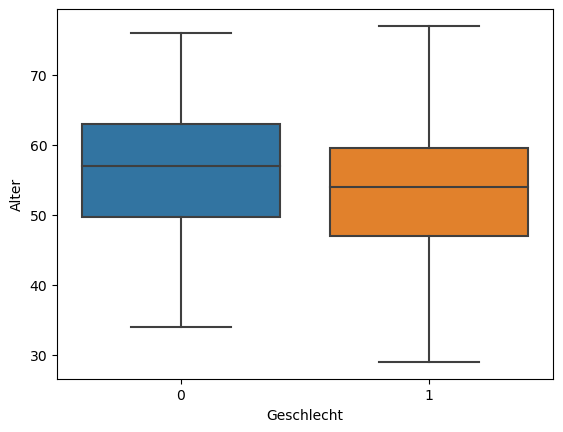

In [1058]:
sns.boxplot(x='Geschlecht', y='Alter', data=df)
fig.show()

Korrelationen der Attribute

<Axes: >

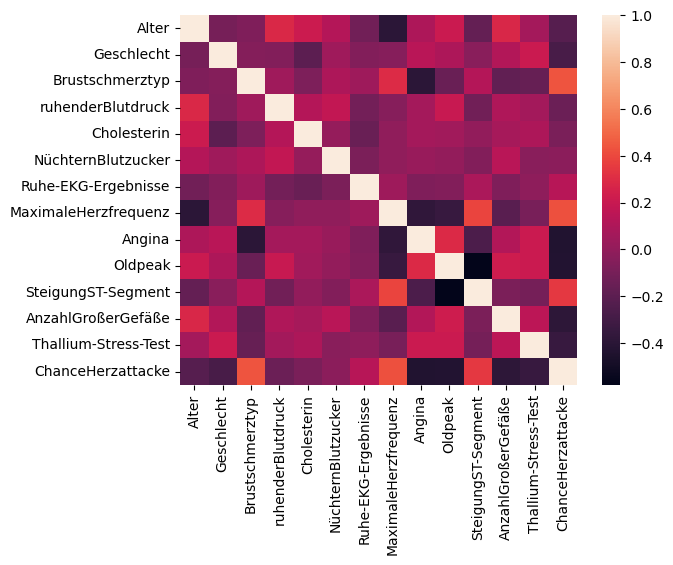

In [1059]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False)

Outlier identifizieren

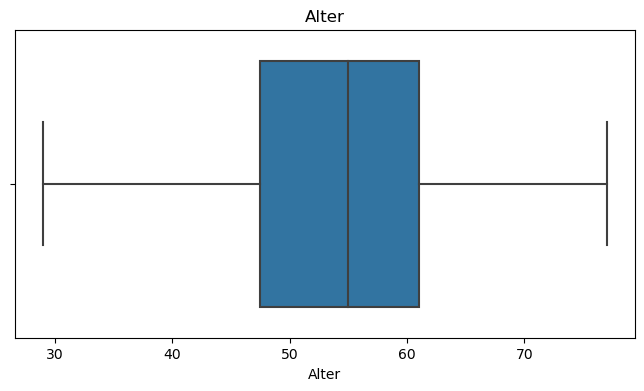

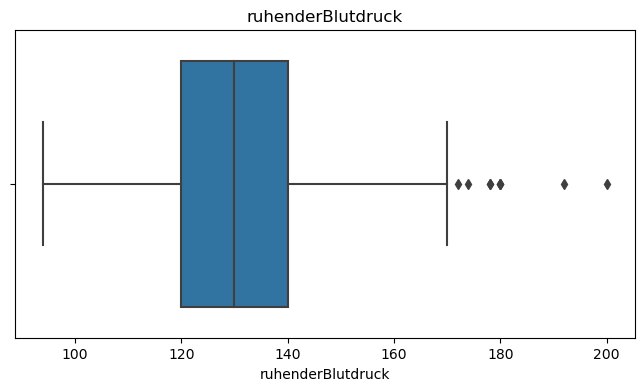

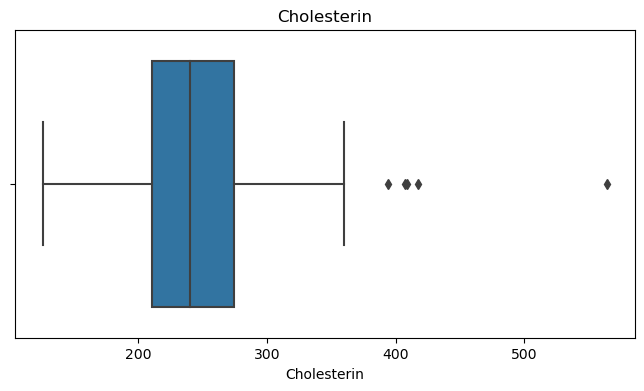

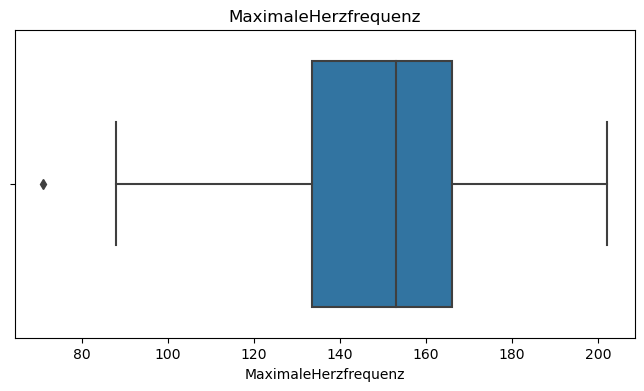

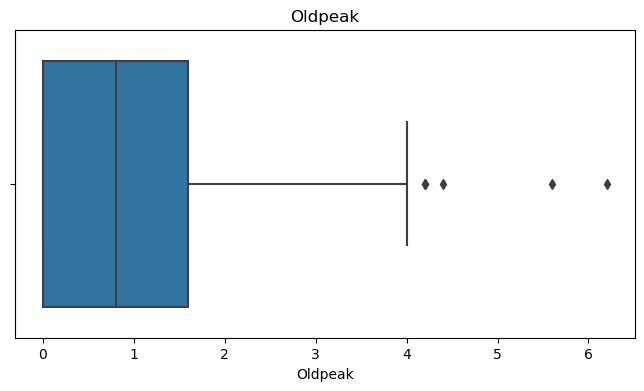

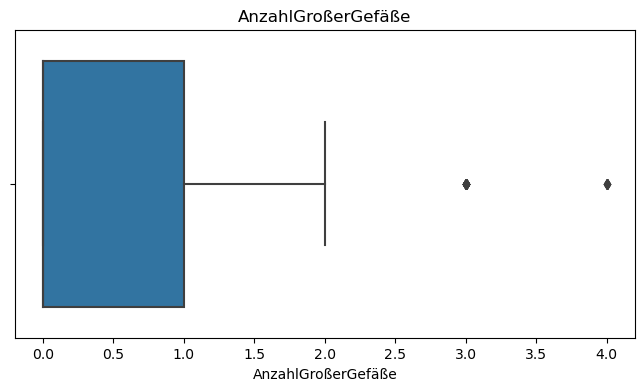

In [1119]:
selected_columns = ["Alter", "ruhenderBlutdruck", "Cholesterin", "MaximaleHerzfrequenz", "Oldpeak", "AnzahlGroßerGefäße"]


for column in selected_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column])
    plt.title(column)
    plt.show()

### Daten bereinigen und vorbereiten

In [1061]:
#Libs
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Spalten umbenennen

In [1064]:
#Zielvariable definieren
X = df.drop("ChanceHerzattacke", axis=1)
y = df["ChanceHerzattacke"]

In [1065]:
# Normalisierung der Daten
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [1066]:
# Aufteilung in Trainings- und Testdaten
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [1067]:
# Ausgabe der Dimensionen der Trainings- und Testdaten
print("Trainingsdaten Größe:", X_train_log.shape)
print("Testdaten Größe:", X_test_log.shape)

Trainingsdaten Größe: (242, 13)
Testdaten Größe: (61, 13)


### Erstellen der Logistischen Regression

In [1068]:
#Bibliotheken
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

In [1069]:
# Erstellen und Trainieren des logistischen Regressionsmodells
model = LogisticRegression()
model.fit(X_train_log, y_train_log)

LogisticRegression()

In [1070]:
# Vorhersagen auf Testdaten
y_pred = model.predict(X_test_log)

In [1071]:
# Bewertung des Modells
accuracy = accuracy_score(y_test_log, y_pred)
print("Genauigkeit:", accuracy)

Genauigkeit: 0.8524590163934426


In [1072]:
conf_matrix = confusion_matrix(y_test_log, y_pred)
print("Konfusionsmatrix:\n", conf_matrix)

Konfusionsmatrix:
 [[25  4]
 [ 5 27]]


In [1073]:
class_report = classification_report(y_test_log, y_pred)
print("Klassifikationsbericht:\n", class_report)

Klassifikationsbericht:
               precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



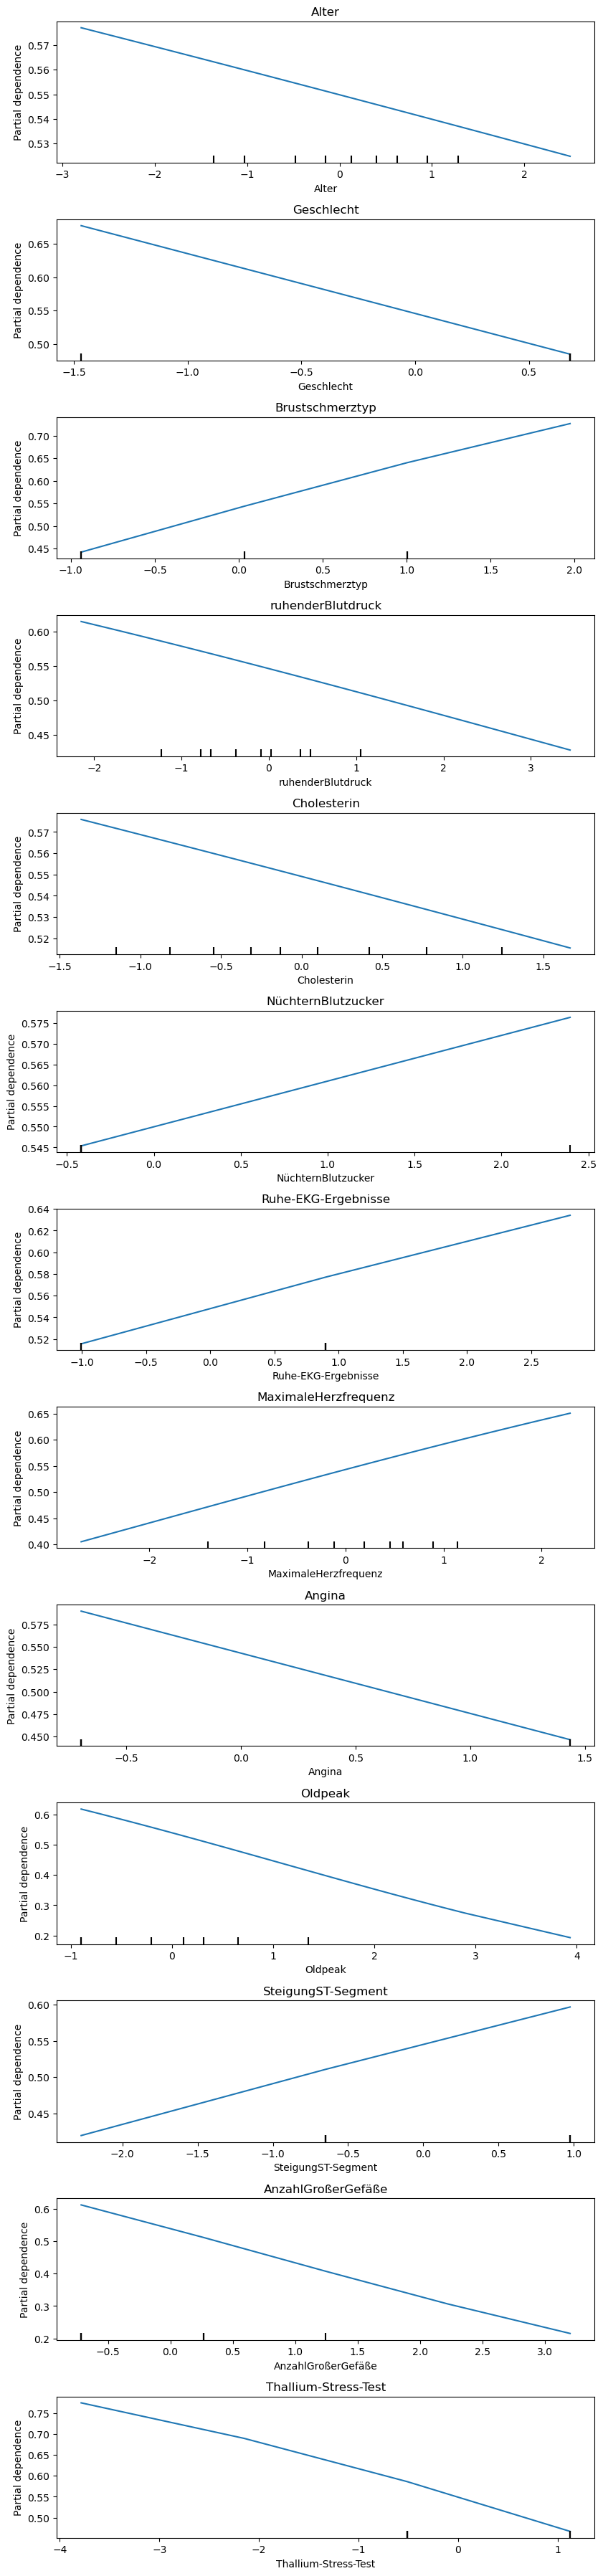

In [1074]:
# Ihre Feature-Namen
feature_names = ["Alter", "Geschlecht", "Brustschmerztyp", "ruhenderBlutdruck", "Cholesterin", "NüchternBlutzucker", "Ruhe-EKG-Ergebnisse", "MaximaleHerzfrequenz", "Angina", "Oldpeak", "SteigungST-Segment", "AnzahlGroßerGefäße", "Thallium-Stress-Test"]

# Plot der Partial Dependence Plots
fig_width = 10  # Breite des Plots
fig_height_per_subplot = 3  # Höhe pro Subplot
fig, ax = plt.subplots(len(feature_names), 1, figsize=(fig_width, fig_height_per_subplot * len(feature_names)))

# Erzeugen der Partial Dependence Plots
for i, feature in enumerate(feature_names):
    disp = PartialDependenceDisplay.from_estimator(model, X_train_log, features=[i],
                                                   feature_names=feature_names, ax=ax[i])
    ax[i].set_ylabel('')  # Entfernen der y-Achsen-Beschriftung
    ax[i].set_title(feature)  # Setzen des Feature-Namens als Titel

# Anpassung des Layouts
fig.subplots_adjust(top=0.95, bottom=0.05, left=0.2, right=0.95, hspace=0.4, wspace=0.2)

plt.show()

# Random Forest

### Bibs

In [1075]:
from sklearn.ensemble import RandomForestClassifier

### Daten aufteilen

In [1076]:
# Aufteilung in Trainings- und Testdaten
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.2, random_state=42)

### Erstellen des Random Forest

In [1077]:
model_rf = RandomForestClassifier(max_depth=3, random_state=10)

In [1078]:
model_rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier(max_depth=3, random_state=10)

In [1079]:
y_pred_rf = model_rf.predict(X_test_rf)

In [1080]:
accuracy_score(y_pred_rf,y_test_rf)

0.8852459016393442

In [1081]:
confusion_matrix(y_pred_rf, y_test_rf)

array([[25,  3],
       [ 4, 29]])

In [1082]:
class_report = classification_report(y_test_rf, y_pred_rf)
print("Klassifikationsbericht:\n", class_report)

Klassifikationsbericht:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



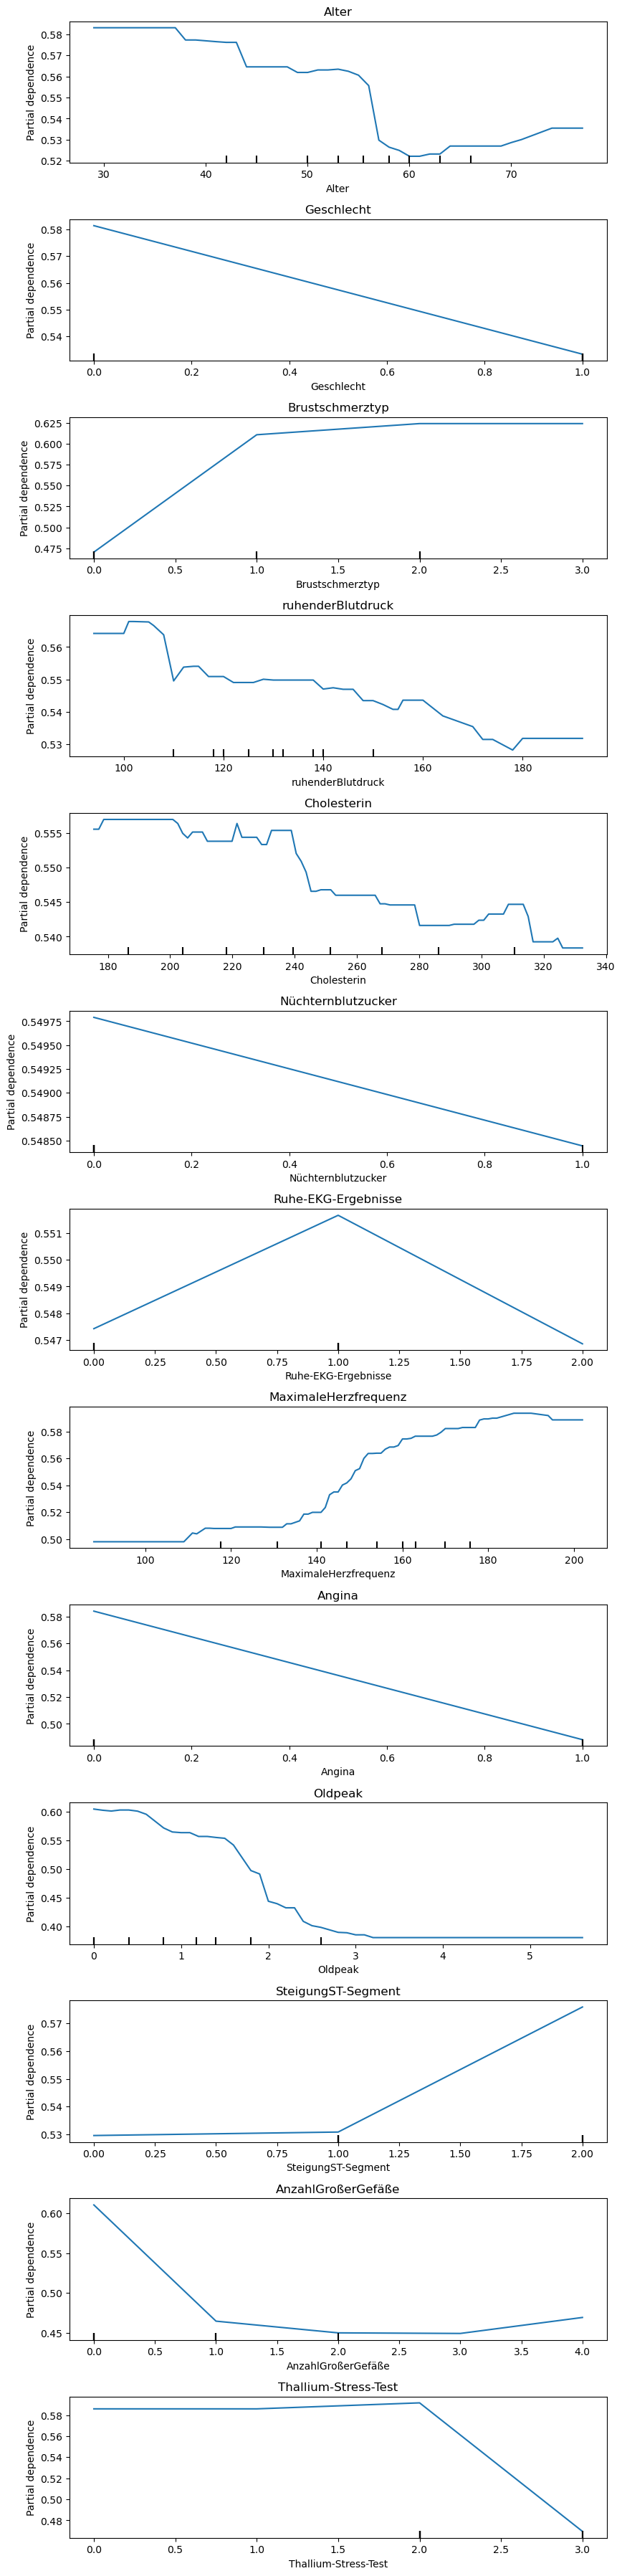

In [1083]:
# Ihre Feature-Namen
feature_names = ["Alter", "Geschlecht", "Brustschmerztyp", "ruhenderBlutdruck", "Cholesterin", "Nüchternblutzucker", "Ruhe-EKG-Ergebnisse", "MaximaleHerzfrequenz", "Angina", "Oldpeak", "SteigungST-Segment", "AnzahlGroßerGefäße", "Thallium-Stress-Test"]
# Plot der Partial Dependence Plots
fig_width = 10  # Breite des Plots
fig_height_per_subplot = 3  # Höhe pro Subplot
fig, ax = plt.subplots(len(feature_names), 1, figsize=(fig_width, fig_height_per_subplot * len(feature_names)))

# Erzeugen der Partial Dependence Plots
for i, feature in enumerate(feature_names):
    disp = PartialDependenceDisplay.from_estimator(model_rf, X_train_rf, features=[i],
                                                   feature_names=feature_names, ax=ax[i])
    ax[i].set_ylabel('')  # Entfernen der y-Achsen-Beschriftung
    ax[i].set_title(feature)  # Setzen des Feature-Namens als Titel

# Anpassung des Layouts
fig.subplots_adjust(top=0.95, bottom=0.05, left=0.2, right=0.95, hspace=0.4, wspace=0.2)

plt.show()

# Modelle mit ausgewählten Features 

In [1087]:
df_selected = df.drop(["Alter", "Geschlecht", ], axis=1)

In [1088]:
#Zielvariable definieren
X_selected = df_selected.drop("ChanceHerzattacke", axis=1)
y_selected = df_selected["ChanceHerzattacke"]

In [1089]:
# Normalisierung der Daten
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

In [1108]:
# Aufteilung in Trainings- und Testdaten
X_train_sel, X_test_sel, y_train_sel, y_test_sel = train_test_split(X_scaled, y_selected, test_size=0.2, random_state=42)

In [1109]:
lg_sel = LogisticRegression()
lg_sel.fit(X_train_sel, y_train_sel)

LogisticRegression()

In [1110]:
y_pred_lg_sel = lg_sel.predict(X_test_sel)

In [1111]:
accuracy_score(y_pred_lg_sel, y_test_sel)

0.8688524590163934

In [1112]:
conf_matrix = confusion_matrix(y_test_sel, y_pred_lg_sel)
print("Konfusionsmatrix:\n", conf_matrix)

Konfusionsmatrix:
 [[25  4]
 [ 4 28]]


### Random Forest selected

In [1113]:
rf_sel = RandomForestClassifier(max_depth=2, random_state=10)

In [ ]:
rf_sel.fit(X_train_sel,)